In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from statistics import mean
from fractions import Fraction as fr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Traindata_df = pd.read_csv('/content/1644871518_6273746_cleveland-train.csv')
Testdata_df = pd.read_csv('/content/1644871518_6284828_cleveland-test.csv')
Testdata_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,56,1,2,130,221,0,2,163,0,0.0,1,0,7
141,67,1,3,152,212,0,2,150,0,0.8,2,0,7
142,44,1,4,120,169,0,0,144,1,2.8,3,0,6
143,57,0,4,140,241,0,0,123,1,0.2,2,0,7


In [ ]:
    X= Traindata_df.iloc[0:152,0:13]
    Y= Traindata_df['heartdisease::category|-1|1']
    X_test_file=Testdata_df[0:145]
    
    X=X.to_numpy()
    Y=Y.to_numpy()
    X_test_file=X_test_file.to_numpy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=15)
print("X_train",X_train)
print("Y_train",Y_train)
print(Y_train.shape)

X_train [[52.  1.  4. ...  1.  2.  7.]
 [45.  0.  4. ...  2.  0.  3.]
 [50.  0.  2. ...  1.  0.  3.]
 ...
 [67.  1.  4. ...  2.  0.  3.]
 [59.  1.  3. ...  2.  1.  6.]
 [35.  1.  2. ...  1.  0.  3.]]
Y_train [ 1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1
  1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1
 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1
 -1  1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1]
(91,)


In [ ]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters: X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. """  
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [ ]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters: X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    #theta = np.zeros((len(X[0])+1,1))
    
    return theta

In [ ]:
def sigmoid(z):
    """ Calculate the sigmoid value of the inputs
        Parameters: z:  values
        Return value: the sigmoid value
    """
    z = 1 / (1+math.e**-z)
    return z

In [ ]:
def logloss(y_new,X,theta,m):
    """ Calculate the logloss value of the inputs
        Parameters: y_new: training data labels  X: independent variables matrix
                    theta: weight vector         m:total number of training samples
        Return value: the cross entropy error 
    """
    z=sigmoid(y_new*np.dot(X,theta))
    cost= (1/m)* np.sum((np.log(1/z)))
    return cost

In [288]:
def gradient(y_new,vectorX,theta,m):
    """ Calculate the gradient value of the inputs
        Parameters: y_new: training data labels  vectorX: independent variables matrix
                    theta: weight vector         m:total number of training samples
        Return value: the gradient value 
    """
    yixi = y_new*vectorX
    z= -y_new*np.dot(vectorX,theta)
    z=sigmoid(z)
    vector_gr = yixi * z
    vector_gr=np.array(vector_gr)
    vector_gr=vector_gr.sum(axis=0)
    gradient= (-1/m)*(vector_gr)
    return gradient

In [284]:
def Logistics_Regression(X,y,learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters: X: independent variables matrix y: dependent variables matrix
                     learningrate: learningrate of Gradient Descent
                    iterations: the number of iterations
        Return value: the final theta vector,cross_entropy error and the plot of cost function
    """
   
    y_new = np.reshape(y, (len(y), 1))  
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    cross_entropy=0
    iteration=0
    index=[]
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    for i in range(iterations):
        gradients = gradient(y_new,vectorX,theta,m)
        index.append(i)
        if(gradients.all()<=0.001):
            print("converged") 
            return theta,cross_entropy
        gradients=np.reshape(gradients,(14,1))
        theta = theta - learningrate * gradients
        y_pred = sigmoid(vectorX.dot(theta))
        cost_value = logloss(y_new,vectorX,theta,m)
        cost_lst.append(cost_value)
        cross_entropy= cost_lst[-1]
    plt.plot(index,cost_lst)
    plt.show()
    
    return theta,cross_entropy

In [240]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:X: the input matrix i: the column
         Return value: an array with desired column
    """
    return [row[i] for row in matrix]

def accuracy_LR(X,y,learningrate, iteration,X_test, y_test):
    """ Returning the accuracy score for a training model"""
    ideal,cost_value= Logistics_Regression(X,y,learningrate, iteration)
    hypo_line = ideal[0]
    acc=0
    for i in range(1,len(ideal)):
        hypo_line = hypo_line + ideal[i]*column(X_test,i-1)
    logistic_function = sigmoid(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = -1
    if len(y_test)>0:
      last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_test.reshape(len(y_test),1)),1)
      count = 0
      for i in range(len(y_test)):
        if last1[i][0] == last1[i][1]:
            count = count+1
      acc = count/(len(y_test))
      plt.show()
    return ideal,cost_value,logistic_function,1-acc

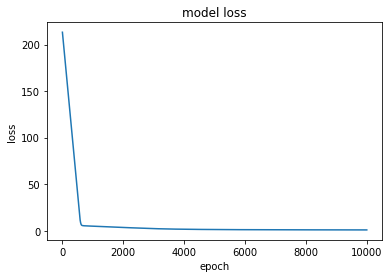

' plotted graph  cross entropy error for each iteration '

In [313]:
""" learning Logistic Regression model using Gradient algorithm 
    parameters : X_train - Independent variables matrix
                 Y_train -  dependent variables matrix
                 X_test - testing data variable matrix
                 Y-test - testing data 
                 learning rate =0.00001
    for 10000 iterations 
"""

w1,cross_entropy1,predict1,classificatn_err1=accuracy_LR(X_train,Y_train, 0.00001, 10000, X_test, Y_test)

""" cross entropy error for each iteration """

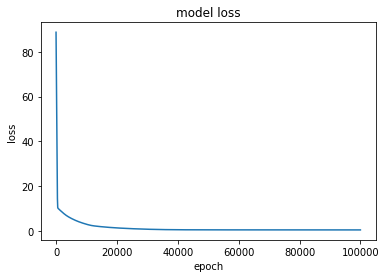

In [330]:
"""for 100000 iterations"""
w2,cross_entropy2,predict2,classificatn_err2=accuracy_LR(X_train,Y_train, 0.00001, 100000,X_test, Y_test)

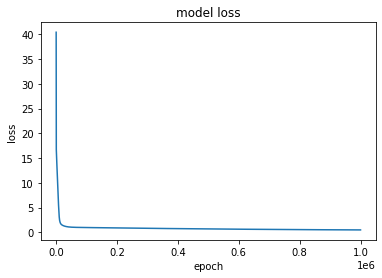

In [279]:
"""for 1000000 iterations"""
w3,cross_entropy3,predict3,classificatn_err3=accuracy_LR(X_train,Y_train, 0.00001, 1000000,X_test, Y_test)

In [314]:
"""displaying returned weight vector, cross entropy error, prediction array , classification error on the training data"""

print("weight vector1",w1,"cross_entropy1",cross_entropy1,"predict1",predict1,"classificatn_err1",classificatn_err1)


weight vector1 [[-1.58148662e+00]
 [ 2.73318265e-01]
 [-1.32296673e+00]
 [ 4.97312779e-01]
 [ 1.30482935e-03]
 [-4.63897326e-02]
 [ 4.53461785e-01]
 [ 5.85814432e-01]
 [-3.51049813e-02]
 [ 1.42804403e-01]
 [ 4.57220114e-02]
 [ 2.16671322e-01]
 [-1.18842550e+00]
 [ 4.08559507e-01]] cross_entropy1 0.9210527043284145 predict1 [ 1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.
  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
 -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1. -1.] classificatn_err1 0.4098360655737705


In [331]:
print("weight vector2",w2,"cross_entropy2",cross_entropy2,"predict2",predict2,"classificatn_err2",classificatn_err2)

weight vector2 [[ 0.1669055 ]
 [ 0.00242656]
 [-0.39422095]
 [-0.20523375]
 [ 0.0204294 ]
 [-0.01260655]
 [ 1.67345576]
 [ 0.48555376]
 [-0.02037314]
 [ 1.86432726]
 [ 0.33827224]
 [ 0.37371414]
 [-0.11494965]
 [ 0.36849555]] cross_entropy2 0.5432111092994525 predict2 [ 1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.
 -1.  1.  1.  1.  1.  1. -1.] classificatn_err2 0.3114754098360656


In [250]:
print("weight vector3",w3,"cross_entropy3",cross_entropy3,"predict3",predict3,"classificatn_err3",classificatn_err3)

weight vector3 [[-2.76407252e+00]
 [-3.22044177e-02]
 [ 6.92743127e-01]
 [-5.15967255e-01]
 [ 2.87439233e-02]
 [ 2.09619394e-03]
 [-4.56109912e-01]
 [ 5.94831781e-01]
 [-2.56633387e-02]
 [ 3.02984285e-01]
 [ 1.84226920e+00]
 [-7.06054255e-01]
 [ 1.33670471e+00]
 [ 6.42917112e-01]] cross_entropy3 0.4608133499537578 predict3 [ 1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.
  1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.
  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.
 -1.  1.  1.  1. -1. -1. -1.] classificatn_err3 0.24590163934426235


In [ ]:
""" predicting class labels  for the given test file 1644871518_6284828_cleveland-test.csv """
""" for 10000, 100000, 1000000 iterations""""
y=[]
y=np.array(y)
w_test1,cross_entropy_test1,predict_test1,err=accuracy_LR(X_train,Y_train, 0.00001, 10000,X_test_file, y)
#w_test2,cross_entropy_test2,predict_test2,err=accuracy_LR(X_train,Y_train, 0.00001, 100000,X_test_file, y)
#w_test3,cross_entropy_test3,predict_test3,err=accuracy_LR(X_train,Y_train, 0.00001, 1000000,X_test_file, y)


In [ ]:
""" writing predicted class labels for each iteration bound """

with open("test2_2.dat", "w") as a_file:
    for i in range(len(predict_test2)):
        a_file.write(str(int(float(predict_test2[i])))) 
        a_file.write('\n')

with open("test1_8.dat", "w") as a_file:
    for i in range(len(predict_test1)):
        a_file.write(str(int(float(predict_test1[i]))))
        a_file.write('\n')

with open("test3_2.dat", "w") as a_file:
    for i in range(len(predict_test3)):
        a_file.write(str(int(float(predict_test3[i]))))
        a_file.write('\n')

In [ ]:
""" skLearn implmentation of Logistic Regression model """ 

""" splitting the input training data into train data and test data """

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train , Y_train, test_size = 0.4, random_state = 0)

In [ ]:
 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train1, Y_train1)

""" displays intercept and the coefficients"""
classifier.intercept_, classifier.coef_

(array([-0.36951287]),
 array([[-0.0402764 ,  0.59360083,  0.30576364,  0.0318297 , -0.0011475 ,
          0.28463929,  0.21089468, -0.03517772, -0.182979  ,  0.95112193,
         -0.29138169,  0.57392279,  0.31224165]]))

In [ ]:
"""predicts and prints the accuracy score for the test data of the input training data """
y_pred = classifier.predict(X_test1)
print(accuracy_score(y_pred,Y_test1))

"""predicts the class labels for the test data of the input testing data """
y_test_pred = classifier.predict(X_test_file)

0.8378378378378378


In [ ]:
"""displays the classification error of the training data """
print("classification error",1-0.8378)

classification error 0.1622


In [295]:
""" computes the cross entropy error for the skLearn Logistic regression model """
import array
X_1og=generateXvector(X_train1)
Y_log=Y_train1.reshape(54,1)
theta_log=[]
theta_log_2=[]
theta_log_2=classifier.coef_[0][0:14]
theta_log = np.insert(theta_log_2, 0, classifier.intercept_[0])
theta_log=theta_log.reshape(14,1)
print(Y_log.shape,X_1og.shape,theta_log.shape,theta_log)
print("loss", logloss(Y_log,X_1og,theta_log,m))

(54, 1) (54, 14) (14, 1) [[-0.36951287]
 [-0.0402764 ]
 [ 0.59360083]
 [ 0.30576364]
 [ 0.0318297 ]
 [-0.0011475 ]
 [ 0.28463929]
 [ 0.21089468]
 [-0.03517772]
 [-0.182979  ]
 [ 0.95112193]
 [-0.29138169]
 [ 0.57392279]
 [ 0.31224165]]
loss 0.3895001102007334


In [294]:
"""writing the predicted data of skLearn Logistic regression model into output file """
with open("testlog.dat", "w") as a_file:
    for i in range(len(y_test_pred)):
        a_file.write(str(int(float(y_test_pred[i]))))
        a_file.write('\n')

In [293]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:X: the input matrix i: the column
         Return value: an array with desired column
    """
    return [row[i] for row in matrix]

In [292]:
"""feature scaling implementation """
""" computes the difference between traing data and mean ,divided by standard deviation """ 
def normalize(X):
    X1= (X - np.mean(X))/np.std(X)
    return X1


In [308]:
"""Logistic regression model using gradient descent for the scaled features  """
""" terminates the algorithm whenever each term in gradient reaches the given tolerance level - here 10^-6"""
def Logistics_Regression_scale(X,y,learningrate):
    
    y_new = np.reshape(y, (len(y), 1))  
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    cross_entropy=0
    iterations=0
      
    while True:
        iterations+=1
        gradients = gradient(y_new,vectorX, theta,m)
        print(gradients,iterations)
        theta = theta - learningrate * gradients
        if(gradients.all()<=0.5):
           break;
        y_pred = sigmoid(vectorX.dot(theta))
        cost_value = logloss(y_new,vectorX,theta,m)
        cost_lst.append(cost_value)
        #print(cost_lst,iteration)
        cross_entropy= cost_lst[-1]
    

    return theta,cross_entropy,iterations

In [311]:
X_scale_train=normalize(X_train)
theta,cross_entropy,iterations=Logistics_Regression_scale(X_scale_train,Y_train,0.08)
 

Streaming output truncated to the last 5000 lines.
[-1.64398409e-16 -1.72900461e-16  1.94307239e-01  1.82173068e-01
 -2.18903040e-15 -1.72023568e-16  1.97975709e-01  1.93319574e-01
 -7.83866256e-17  1.96000379e-01  1.91019725e-01  1.90074389e-01
  1.93037384e-01  1.70603277e-01] 380941
[-1.64398409e-16 -1.72900461e-16  1.94307239e-01  1.82173068e-01
 -2.16554491e-15 -1.72023568e-16  1.97975709e-01  1.93319574e-01
 -7.83866256e-17  1.96000379e-01  1.91019725e-01  1.90074389e-01
  1.93037384e-01  1.70603277e-01] 380942
[-1.64398409e-16 -1.72900461e-16  1.94307239e-01  1.82173068e-01
 -2.18094773e-15 -1.72023568e-16  1.97975709e-01  1.93319574e-01
 -7.83866256e-17  1.96000379e-01  1.91019725e-01  1.90074389e-01
  1.93037384e-01  1.70603277e-01] 380943
[-1.64398409e-16 -1.72900461e-16  1.94307239e-01  1.82173068e-01
 -2.18918290e-15 -1.72023568e-16  1.97975709e-01  1.93319574e-01
 -7.83866256e-17  1.96000379e-01  1.91019725e-01  1.90074389e-01
  1.93037384e-01  1.70603277e-01] 380944
[-1.6

KeyboardInterrupt: ignored

In [ ]:
theta,cross_entropy,iterations=Logistics_Regression_scale(X_scale_train,Y_train,0.0001)

Streaming output truncated to the last 5000 lines.
[ 9.12243694e-04  9.42547797e-03 -2.90461595e-01 -2.75571786e-01
  3.30627829e-04  3.86059900e-08 -2.92438208e-01 -2.87830361e-01
  2.61187219e-04 -2.91906678e-01 -2.90067287e-01 -2.83729869e-01
 -2.91408641e-01 -2.69046467e-01] 328155
[ 9.12228745e-04  9.42544719e-03 -2.90461592e-01 -2.75571783e-01
  3.30621303e-04  3.86040542e-08 -2.92438204e-01 -2.87830358e-01
  2.61181761e-04 -2.91906674e-01 -2.90067284e-01 -2.83729866e-01
 -2.91408637e-01 -2.69046465e-01] 328156
[ 9.12213797e-04  9.42541642e-03 -2.90461588e-01 -2.75571781e-01
  3.30614778e-04  3.86021182e-08 -2.92438201e-01 -2.87830355e-01
  2.61176302e-04 -2.91906670e-01 -2.90067280e-01 -2.83729863e-01
 -2.91408633e-01 -2.69046464e-01] 328157
[ 9.12198848e-04  9.42538564e-03 -2.90461585e-01 -2.75571779e-01
  3.30608252e-04  3.86001824e-08 -2.92438197e-01 -2.87830352e-01
  2.61170844e-04 -2.91906666e-01 -2.90067277e-01 -2.83729859e-01
 -2.91408629e-01 -2.69046462e-01] 328158
[ 9.1

KeyboardInterrupt: ignored

In [ ]:
theta,cross_entropy,iterations=Logistics_Regression_scale(X_scale_train,Y_train,0.05)

Streaming output truncated to the last 5000 lines.
[ 2.86095933e-16  1.10885050e-15 -2.78940525e-01 -2.64689928e-01
  1.06386206e-15  3.95776208e-15 -2.80633665e-01 -2.76118624e-01
  3.93092152e-15 -2.80210380e-01 -2.78460802e-01 -2.72309059e-01
 -2.79504905e-01 -2.58340653e-01] 232897
[ 2.97076161e-16  1.11403560e-15 -2.78940525e-01 -2.64689928e-01
  1.11266308e-15  3.85283990e-15 -2.80633665e-01 -2.76118624e-01
  3.94678185e-15 -2.80210380e-01 -2.78460802e-01 -2.72309059e-01
 -2.79504905e-01 -2.58340653e-01] 232898
[ 2.86095933e-16  1.11151930e-15 -2.78940525e-01 -2.64689928e-01
  1.03519147e-15  3.89676081e-15 -2.80633665e-01 -2.76118624e-01
  3.88578059e-15 -2.80210380e-01 -2.78460802e-01 -2.72309059e-01
 -2.79504905e-01 -2.58340653e-01] 232899
[ 2.83655883e-16  1.10374164e-15 -2.78940525e-01 -2.64689928e-01
  1.04556168e-15  3.83819960e-15 -2.80633665e-01 -2.76118624e-01
  3.88822064e-15 -2.80210380e-01 -2.78460802e-01 -2.72309059e-01
 -2.79504905e-01 -2.58340653e-01] 232900
[ 2.9

KeyboardInterrupt: ignored